In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from keras.models import Sequential
from keras.layers import Dense
from keras.activations import relu, sigmoid, tanh
from keras.utils import plot_model

In [7]:
diab = pd.read_csv("diabetes.csv")

diab['class'] = diab['class'].replace({'tested_positive': 1.0, 'tested_negative': 0.0})

all_inputs = diab[['pregnant-times','glucose-concentr','blood-pressure','skin-thickness','insulin','mass-index','pedigree-func','age']].values
all_classes = diab['class'].values

datasets = train_test_split(all_inputs, all_classes, test_size=0.3, random_state=278779)

train_data, test_data, train_labels, test_labels = datasets

In [8]:
scaler = StandardScaler()
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

print(train_data[:3])

[[-0.82523139 -0.8129466  -0.228601    0.38210775  0.03676723  0.13817043
  -0.56599149 -1.01696967]
 [ 2.78739842  1.12464694  2.31826072 -1.30903397 -0.70363281  1.29870234
  -0.66018363  0.99143973]
 [-1.12628387  0.46836526 -1.45109462  0.88318678  0.72610519  1.40072712
   5.31807377  0.0308961 ]]


In [9]:
model = Sequential()
model.add(Dense(6, activation='relu', input_dim=train_data.shape[1]))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_data, train_labels, epochs=200, batch_size=32, verbose=0, validation_data=(test_data, test_labels))

In [10]:
predictions_test_probs = model.predict(test_data)
predictions_test_probs = predictions_test_probs.flatten()

threshold = 0.5
predictions_test = [1 if prob > threshold else 0 for prob in predictions_test_probs]

accuracy = accuracy_score(test_labels, predictions_test)
print("Accuracy: " + str(round(accuracy*100,2)) + "%")


8/8 [==============================] - 0s 1ms/step
Accuracy: 74.46%


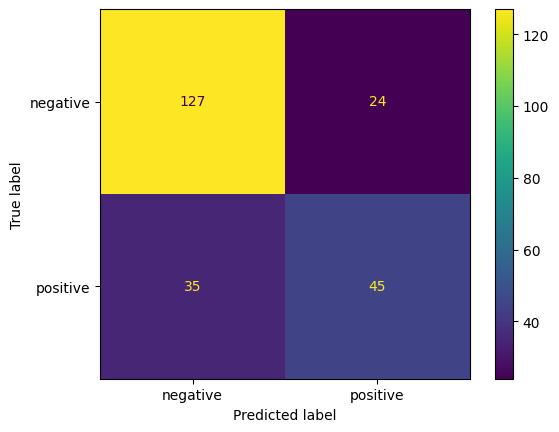

In [11]:
cm = confusion_matrix(test_labels, predictions_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['negative', 'positive'])
disp.plot()

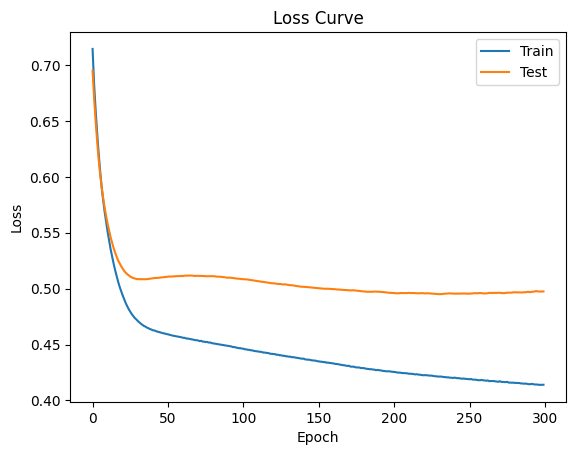

In [15]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_loss, label='Train')
plt.plot(val_loss, label='Test')
plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Jako, że zestaw testowy się pogarsza, a treningowy polepsza to można tu powiedzieć o przeuczeniu naszego algorytmu. Sam algorytm powinno się zatrzymać, gdy krzywa treningowa i krzywa testowa nie będą jednocześnie spadać. W tym wypadku po około 100 wywołaniach.

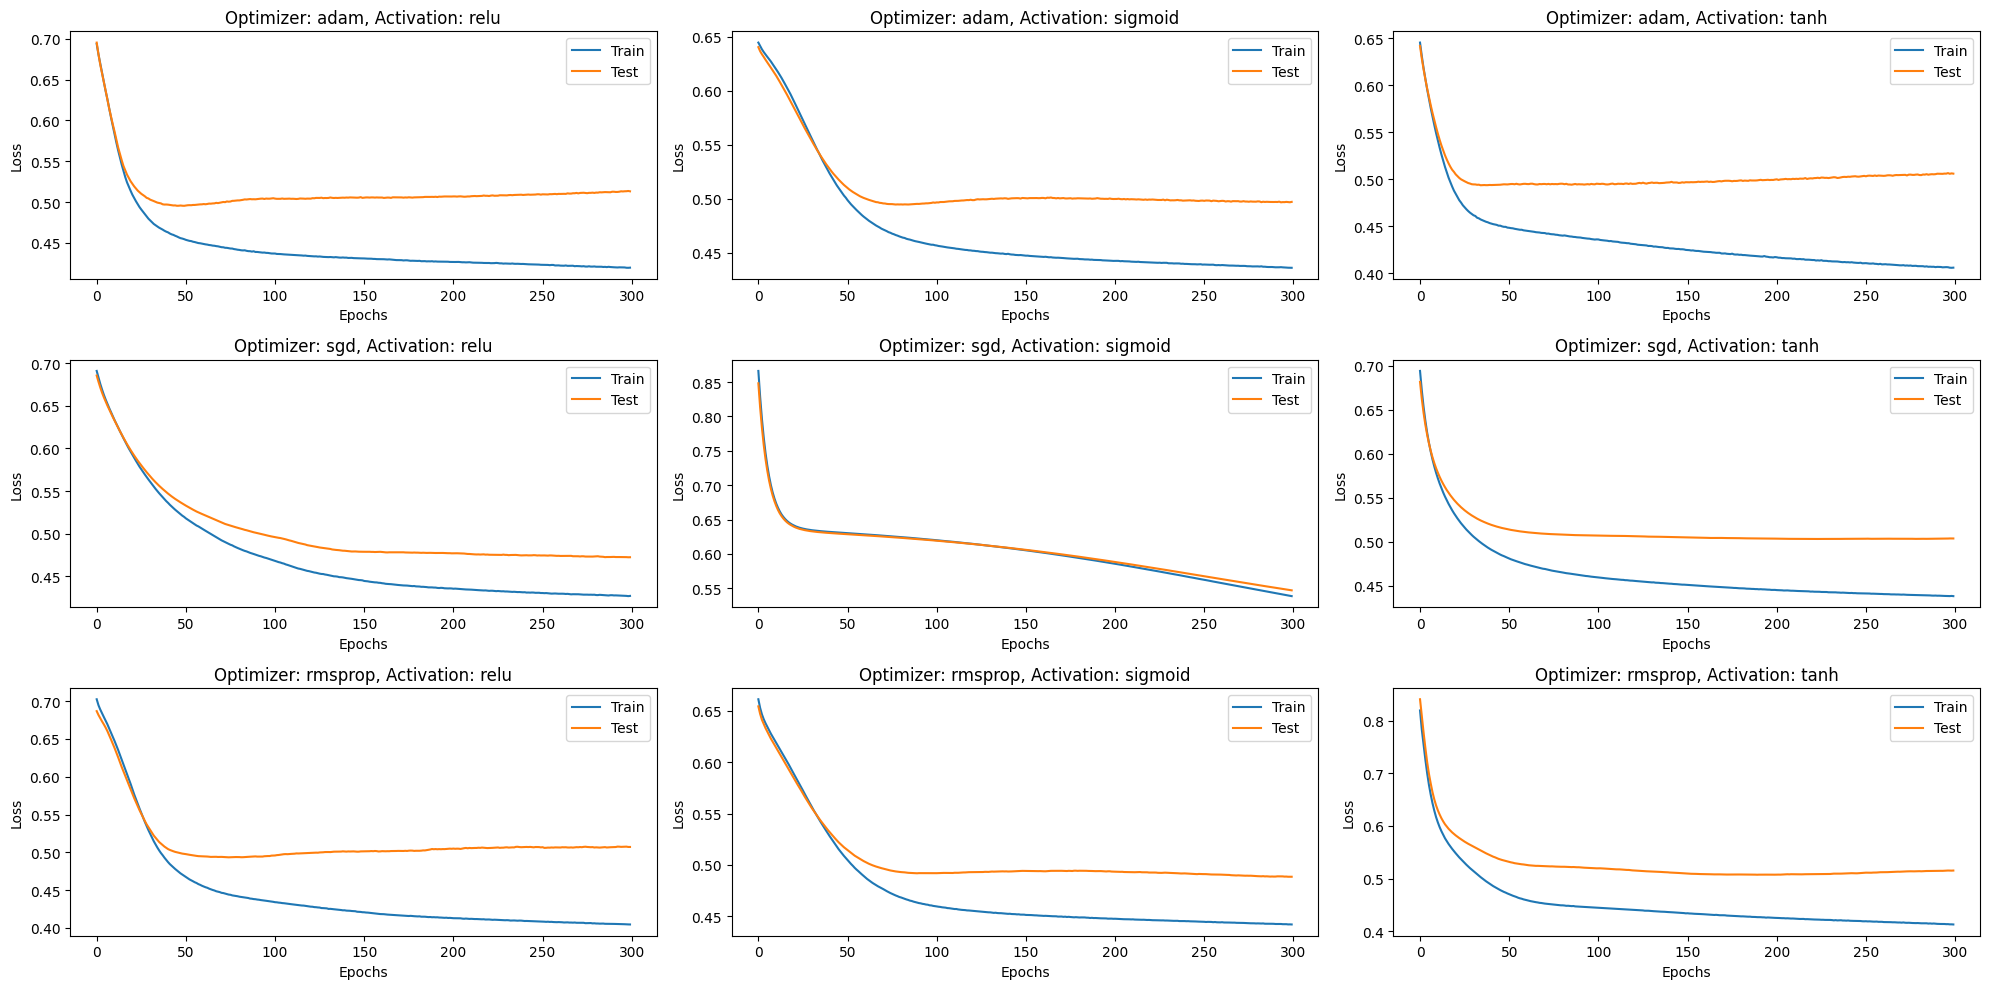

In [17]:
def create_model(optimizer='adam', activation='relu'):
    model = Sequential()
    model.add(Dense(6, activation=activation, input_dim=train_data.shape[1]))
    model.add(Dense(3, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

optimizers = ['adam', 'sgd', 'rmsprop']
activations = [relu, sigmoid, tanh]

plt.figure(figsize=(20, 10))

for i, optimizer in enumerate(optimizers):
    for j, activation in enumerate(activations):
        plt.subplot(len(optimizers), len(activations), i * len(activations) + j + 1)
        model = create_model(optimizer=optimizer, activation=activation)
        history = model.fit(train_data, train_labels, epochs=300, batch_size=32, verbose=0, validation_data=(test_data, test_labels))
        train_loss = history.history['loss']
        val_loss = history.history['val_loss']
        plt.plot(train_loss, label='Train')
        plt.plot(val_loss, label='Test')
        plt.title('Optimizer: {}, Activation: {}'.format(optimizer, activation.__name__))
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

plt.tight_layout()
plt.show()